In [1]:
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt
import re
import datetime as dt
import requests

In [2]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
##############
### Task 1 ###
##############

In [51]:
# reading the datasets
credit = pd.read_csv('credit-data.csv')

In [52]:
# converting zipcode data into a categorical data
credit['zipcode'] = credit['zipcode'].astype('category')

In [53]:
# initial credit df
credit[:10]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0


In [15]:
##############
### Task 2 ###
##############

In [54]:
# 
init_features_col = ['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
init_features = credit.loc[:,init_features_col]

In [55]:
cred_summary = init_features.describe()
cred_summary

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [20]:
##############
### Task 3 ###
##############

In [56]:
credit['MonthlyIncome'] = credit['MonthlyIncome'].fillna(credit.groupby('zipcode')['MonthlyIncome'].transform('mean'))
credit['NumberOfDependents'] = credit['NumberOfDependents'].fillna(0)   

In [22]:
##############
### Task 4 ###
##############

In [57]:
# dicretizing criteria
criteria_dict = {'MonthlyIncome':{'bins': [-1, 2500, 4500, 8500, 30000, 3500000],
                               'group_names': ['LowIncome', 'Low-MiddleIncome', 'MiddleIncome', 'Upper-MiddleIncome','HighIncome']},
                 'NumberOfDependents':{'bins': [0, 0, 3, 6, 20],
                                   'group_names': ['No Dependency', 'Low Dependency', 'Medium Dependency', 'High Dependency']},
                'age':{'bins':[-1, 20, 30, 40, 50, 60, 70,120],
                      'group_names': None}}

In [58]:
# function to dicretize a column based on the criterias
def dicretize_cont(crit_dict, df, colname):
    bins = crit_dict[colname]['bins']
    group_names = crit_dict[colname]['group_names']
    categories = pd.cut(df[colname], bins, labels=group_names)
    
    return categories

In [59]:
credit['IncomeBucket'] = dicretize_cont(criteria_dict, credit, 'MonthlyIncome')

In [60]:
credit['AgeBucket'] = dicretize_cont(criteria_dict, credit, 'age')

In [61]:
# function to create dummy variable from categorical variable
def dummy_cat(df, colname):
    df_dummy = pd.get_dummies(df[colname])
    df = df.join(df_dummy)
    
    return df

In [62]:
credit = dummy_cat(credit, 'IncomeBucket')

In [63]:
credit[:10]

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,IncomeBucket,AgeBucket,LowIncome,Low-MiddleIncome,MiddleIncome,Upper-MiddleIncome,HighIncome
0,1,1,0.766127,45,60644,2,0.802982,9120.000000,13,0,6,0,2.0,Upper-MiddleIncome,"(40, 50]",0,0,0,1,0
1,2,0,0.957151,40,60637,0,0.121876,2600.000000,4,0,0,0,1.0,Low-MiddleIncome,"(30, 40]",0,1,0,0,0
2,3,0,0.658180,38,60601,1,0.085113,3042.000000,2,1,0,0,0.0,Low-MiddleIncome,"(30, 40]",0,1,0,0,0
3,4,0,0.233810,30,60601,0,0.036050,3300.000000,5,0,0,0,0.0,Low-MiddleIncome,"(20, 30]",0,1,0,0,0
4,5,0,0.907239,49,60625,1,0.024926,63588.000000,7,0,1,0,0.0,HighIncome,"(40, 50]",0,0,0,0,1
5,6,0,0.213179,74,60629,0,0.375607,3500.000000,3,0,1,0,1.0,Low-MiddleIncome,"(70, 120]",0,1,0,0,0
6,7,0,0.305682,57,60637,0,5710.000000,6805.487779,8,0,3,0,0.0,MiddleIncome,"(50, 60]",0,0,1,0,0
7,8,0,0.754464,39,60625,0,0.209940,3500.000000,8,0,0,0,0.0,Low-MiddleIncome,"(30, 40]",0,1,0,0,0
8,9,0,0.116951,27,60804,0,46.000000,6764.866399,2,0,0,0,0.0,MiddleIncome,"(20, 30]",0,0,1,0,0
9,10,0,0.189169,57,60629,0,0.606291,23684.000000,9,0,4,0,2.0,Upper-MiddleIncome,"(50, 60]",0,0,0,1,0


In [131]:
##############
### Task 5 ###
##############

In [37]:
features = np.array(['RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'IncomeBucket', 'AgeBucket', 'LowIncome', 'Low-MiddleIncome', 'MiddleIncome',
       'Upper-MiddleIncome', 'HighIncome'])

In [38]:
# preparing data before running logistic regression
le = preprocessing.LabelEncoder()
for col in credit.columns:
    if credit[col].dtype.name == "category":
        data = credit[col]
        le.fit(data.values)
        credit[col]=le.transform(credit[col])

In [41]:
# predicting feature importance using random forest
rdf = RandomForestClassifier()
rdf.fit(credit[features], credit['SeriousDlqin2yrs'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

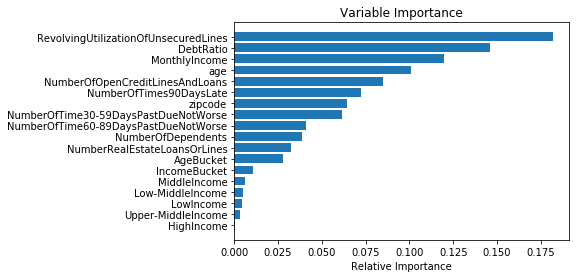

In [174]:
importances = rdf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
pl.barh(padding, importances[sorted_idx], align='center')
pl.yticks(padding, features[sorted_idx])
pl.xlabel("Relative Importance")
pl.title("Variable Importance")
pl.show()

In [42]:
# building classifier using logistic regression method 
logreg = LogisticRegression()
X = credit[features]
y = credit['SeriousDlqin2yrs']
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# check the accuracy on the training set
logreg.score(X , y)

0.93332000000000004

In [45]:
# showing the coefficients of each feature
logreg_result = pd.DataFrame(list(zip(X.columns, np.transpose(logreg.coef_))))
logreg_result.columns = ['features', 'coefficients']
logreg_result.sort('coefficients', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,features,coefficients
3,NumberOfTime30-59DaysPastDueNotWorse,[0.383761281395]
12,AgeBucket,[0.190055623907]
7,NumberOfTimes90DaysLate,[0.168675861278]
10,NumberOfDependents,[0.0884927700193]
8,NumberRealEstateLoansOrLines,[0.0771148898313]
17,HighIncome,[0.00211796409294]
4,DebtRatio,[-4.16140475971e-06]
5,MonthlyIncome,[-1.36230093484e-05]
0,RevolvingUtilizationOfUnsecuredLines,[-5.19219925264e-05]
16,Upper-MiddleIncome,[-0.0065637415502]


In [46]:
# showing predicted y using test data (in this case the same data is used)
y_pred = logreg.predict(credit[features])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
# showing probability of y using test data (in this case the same data is used)
y_prob = logreg.predict_proba(credit[features])
y_prob

array([[ 0.86083143,  0.13916857],
       [ 0.89759704,  0.10240296],
       [ 0.82379234,  0.17620766],
       ..., 
       [ 0.96886505,  0.03113495],
       [ 0.91477128,  0.08522872],
       [ 0.96579288,  0.03420712]])

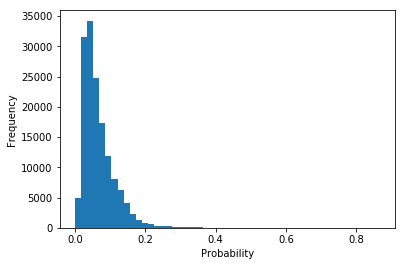

In [49]:
# plotting probability of y
prob_true = y_prob[:,1]
pl.hist(prob_true, bins = 50)
pl.xlabel("Probability")
pl.ylabel("Frequency")

In [169]:
##############
### Task 6 ###
##############

In [50]:
# Evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score
print(accuracy_score(y, y_pred))
print(roc_auc_score(y, y_prob[:, 1]))

0.93332
0.700692899762
